In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에 한글 폰트 적용

from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
# 이번에 여러 파일을 불러오겠습니다.

raw = pd.DataFrame()
raw.head()

file1 = r'.\rawfiles\CARD_SUBWAY_MONTH_201901.csv'
file2 = r'.\rawfiles\CARD_SUBWAY_MONTH_201902.csv'
file3 = r'.\rawfiles\CARD_SUBWAY_MONTH_201903.csv'
file4 = r'.\rawfiles\CARD_SUBWAY_MONTH_201904.csv'
file5 = r'.\rawfiles\CARD_SUBWAY_MONTH_201905.csv'
file6 = r'.\rawfiles\CARD_SUBWAY_MONTH_201906.csv'

temp1 = pd.read_csv(file1)
temp2 = pd.read_csv(file2)
temp3 = pd.read_csv(file3)
temp4 = pd.read_csv(file4)
temp5 = pd.read_csv(file5)
temp6 = pd.read_csv(file6)

# pandas concat 합치때, 인덱스 번호 그래로 간다. 옵션 ignore_index=True 사용하면 인덱스 새로 생성
raw = pd.concat([temp1, temp2, temp3, temp4, temp5, temp6], axis=0)
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104


In [3]:
# 승하자총승객수
raw['승하자총승객수'] = raw['승차총승객수'] + raw['하차총승객수']

In [4]:
# 사용일자의 데이터 타입을 int에서 datetime으로 바꿔준다.
raw['사용일자'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107028 entries, 0 to 17723
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   사용일자     107028 non-null  datetime64[ns]
 1   노선명      107028 non-null  object        
 2   역명       107028 non-null  object        
 3   승차총승객수   107028 non-null  float64       
 4   하차총승객수   107028 non-null  float64       
 5   등록일자     107028 non-null  int64         
 6   승하자총승객수  107028 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 6.5+ MB


In [5]:
# Monday=0, Sunday=6
raw['사용일자'].dt.dayofweek

0        1
1        1
2        1
3        1
4        1
        ..
17719    6
17720    6
17721    6
17722    6
17723    6
Name: 사용일자, Length: 107028, dtype: int64

In [6]:
# 사용일자에 대해서 요일로 변환
raw['요일'] = raw['사용일자'].dt.dayofweek

In [7]:
conv = {
    0 : '일',
    1 : '월',
    2 : '화',
    3 : '수',
    4 : '목',
    5 : '금',
    6 : '토'
}

# 숫자 요일을 한글명 요일로 변경
raw['요일'] = raw['요일'].map(conv)

In [8]:
raw['월']=raw['사용일자'].dt.month
raw['일']=raw['사용일자'].dt.day 

In [9]:
# 사용일자 컬럼에서 년월 값을 가져와 년월 컬럼 만들자

raw['연월'] = raw['사용일자'].dt.strftime('%Y%m')
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하자총승객수,요일,월,일,연월
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,7590.0,월,1,1,201901
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,15658.0,월,1,1,201901
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,43808.0,월,1,1,201901
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,14430.0,월,1,1,201901
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,16549.0,월,1,1,201901


In [10]:
# 사용일자 컬럼에서 년월 값을 가져와 년월 컬럼 만들자

raw['월일'] = raw['사용일자'].dt.strftime('%m%d')
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하자총승객수,요일,월,일,연월,월일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,7590.0,월,1,1,201901,0101
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,15658.0,월,1,1,201901,0101
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,43808.0,월,1,1,201901,0101
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,14430.0,월,1,1,201901,0101
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,16549.0,월,1,1,201901,0101


# 1번 문제

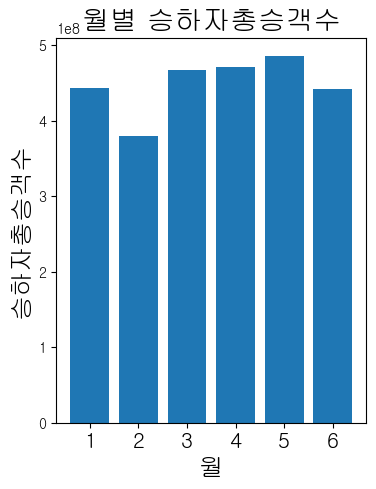

In [11]:
# 1번

from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize=(4,5))

day_of_passen=raw.groupby('월').sum()['승하자총승객수']
label = ['1', '2', '3', '4','5','6']
index = np.arange(len(label))
plt.bar(index, day_of_passen)
plt.title('월별 승하자총승객수', fontsize=20)
plt.xlabel('월', fontsize=18)
plt.ylabel('승하자총승객수', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()

In [12]:
raw

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하자총승객수,요일,월,일,연월,월일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,7590.0,월,1,1,201901,0101
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,15658.0,월,1,1,201901,0101
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,43808.0,월,1,1,201901,0101
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,14430.0,월,1,1,201901,0101
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,16549.0,월,1,1,201901,0101
...,...,...,...,...,...,...,...,...,...,...,...,...
17719,2019-06-30,7호선,마들,6622.0,6116.0,20190703,12738.0,토,6,30,201906,0630
17720,2019-06-30,4호선,노원,14071.0,14702.0,20190703,28773.0,토,6,30,201906,0630
17721,2019-06-30,7호선,중계,9516.0,8981.0,20190703,18497.0,토,6,30,201906,0630
17722,2019-06-30,7호선,하계,11645.0,11121.0,20190703,22766.0,토,6,30,201906,0630


# 2번문제

In [13]:
# 월별 승하자총승객수를 기준으로 내림차순 정렬한 피벗테이블을 생성해서 5월에 승하자총승객수가 가장 많은 달이라는 것을 가정

data_month=pd.pivot_table(raw,index='월',values='승하자총승객수',aggfunc='sum')
data_month=data_month.sort_values(by='승하자총승객수',ascending=False)
data_month

,승하자총승객수
월,
5,485718557.0
4,470934348.0
3,466692826.0
1,442746389.0
6,442210635.0
2,379836010.0


# 3번 문제






# 4번문제

In [14]:
# 연월의 데이터타입 확인

raw['연월'].info

<bound method Series.info of 0        201901
1        201901
2        201901
3        201901
4        201901
          ...  
17719    201906
17720    201906
17721    201906
17722    201906
17723    201906
Name: 연월, Length: 107028, dtype: object>

In [24]:
# 1월 데이터로만 피벗테이블 생성

raw_1=raw[raw['연월']=='201901']
df_pivot = pd.pivot_table(raw_1, index = ['월일','요일'], values = '승하자총승객수', aggfunc= 'sum')
df_pivot = df_pivot.reset_index()
df_pivot.head(7)

,월일,요일,승하자총승객수
0,0101,월,6813453.0
1,0102,화,15214002.0
2,0103,수,15716213.0
3,0104,목,16509281.0
4,0105,금,12092335.0
5,0106,토,8789266.0
6,0107,일,15619172.0


In [ ]:
df_pivot = pd.pivot_table(raw_1, index = ['월일','요일'], values = '승하자총승객수', aggfunc= 'sum')
df_pivot = df_pivot.reset_index()
df_pivot.head(7)

<AxesSubplot: xlabel='월일', ylabel='승하자총승객수'>

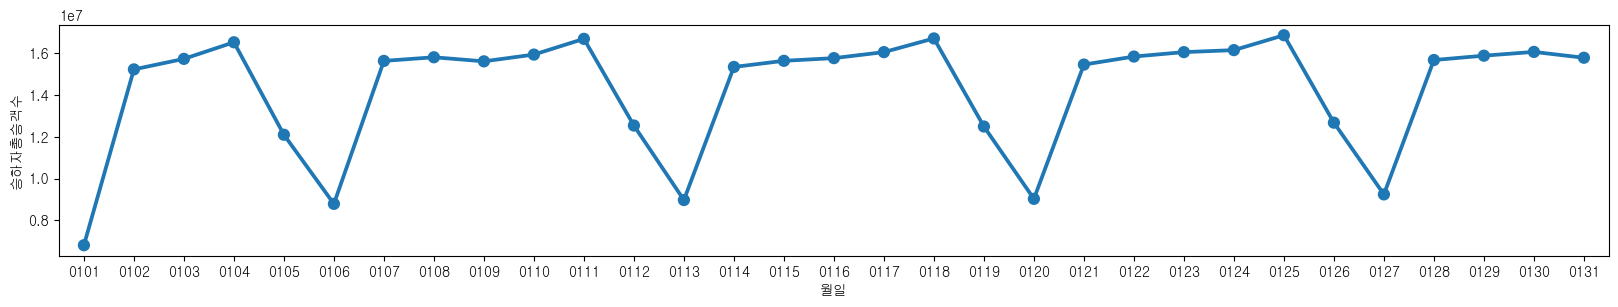

In [25]:
fig, ax = plt.subplots( figsize=(20,3) ) # plt.subplots() 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
# 1월 일별 승하자총승객수 그래프 그리기
sns.pointplot(data = df_pivot, x = '월일', y = '승하자총승객수')

In [29]:
# 요일별 승하자총승객수를 기준으로 내림차순 정렬한 피벗테이블을 생성해서 목요일에 승하자총승객수가 가장 많다고 가정

data_day= pd.pivot_table(raw, index = '요일', values= '승하자총승객수', aggfunc= 'sum')
data_day=data_day.sort_values(by = '승하자총승객수', ascending= False)
data_day

,승하자총승객수
요일,
목,445310717.0
수,428684383.0
화,421134136.0
월,411979965.0
일,391555551.0
금,341950018.0
토,247523995.0


<AxesSubplot: xlabel='요일', ylabel='승하자총승객수'>

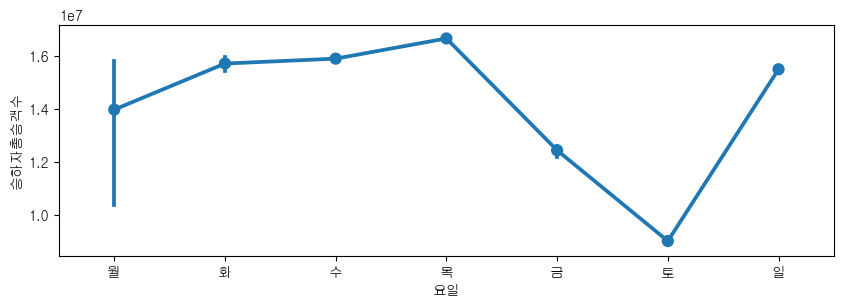

In [27]:
fig, ax = plt.subplots( figsize=(10,3) )
# 1월 요일별 승하자총승객수 그래프 그리기
sns.pointplot(data = df_pivot, x = '요일', y = '승하자총승객수')

In [20]:
day = pd.pivot_table(raw,index='요일',values='승하자총승객수',aggfunc='sum').reset_index()
day = day.sort_values(by='승하자총승객수',ascending=False)
day

,요일,승하자총승객수
1,목,445310717.0
2,수,428684383.0
6,화,421134136.0
3,월,411979965.0
4,일,391555551.0
0,금,341950018.0
5,토,247523995.0


In [ ]:
for month in raw['요일'].unique():
    df_selected = raw[ raw['연월'] == month]  # 해당 연월의 데이터 선택하기
    df_pivot = pd.pivot_table(df_selected, index = ['월일'], values = '승하자총승객수', aggfunc= 'sum')# 월일별 승객수 계산
    df_pivot = df_pivot.reset_index()
    
    fig, ax = plt.subplots( figsize=(20,6) )
    
    plt.title(f'월일별 지하철승객수({month})')  # 그래프 제목 추가하기
    sns.pointplot(data = df_pivot, x = '월일', y = '승하자총승객수')

<AxesSubplot: xlabel='요일', ylabel='승하자총승객수'>

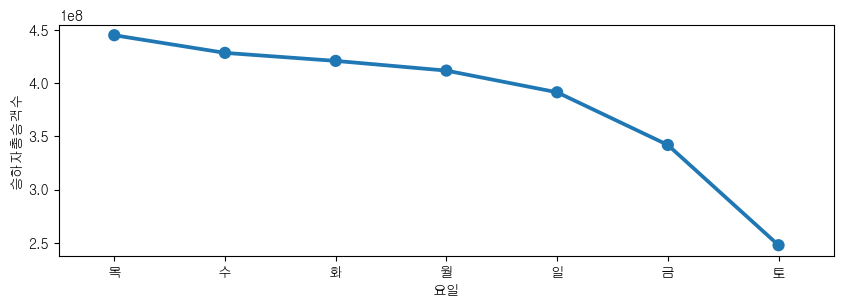

In [40]:
fig, ax = plt.subplots( figsize=(10,3) )
# 1월 요일별 승하자총승객수 그래프 그리기
sns.pointplot(data = day, x = '요일', y = '승하자총승객수')

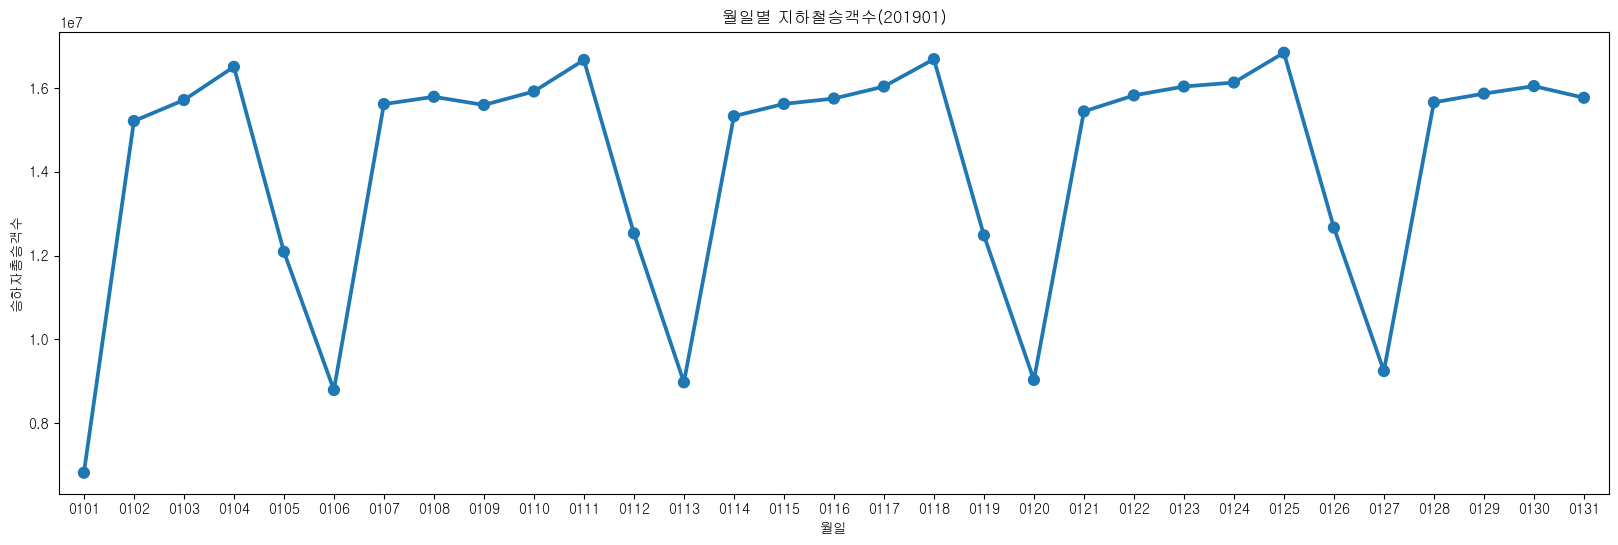

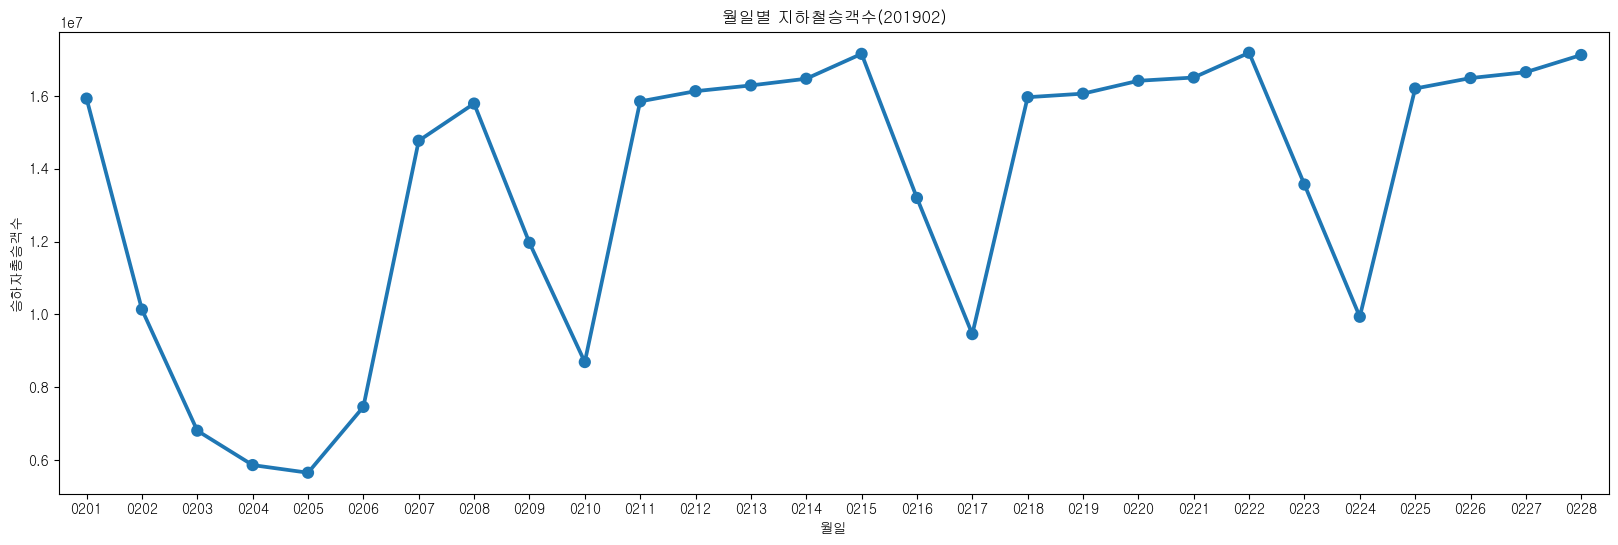

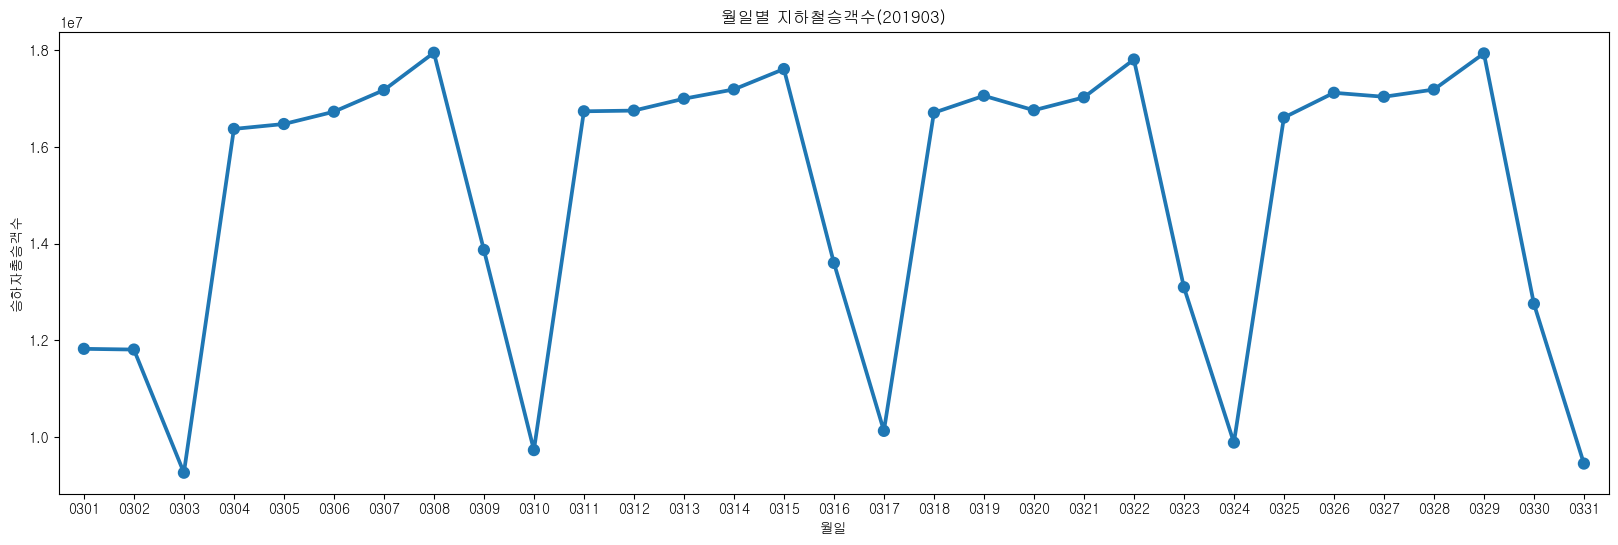

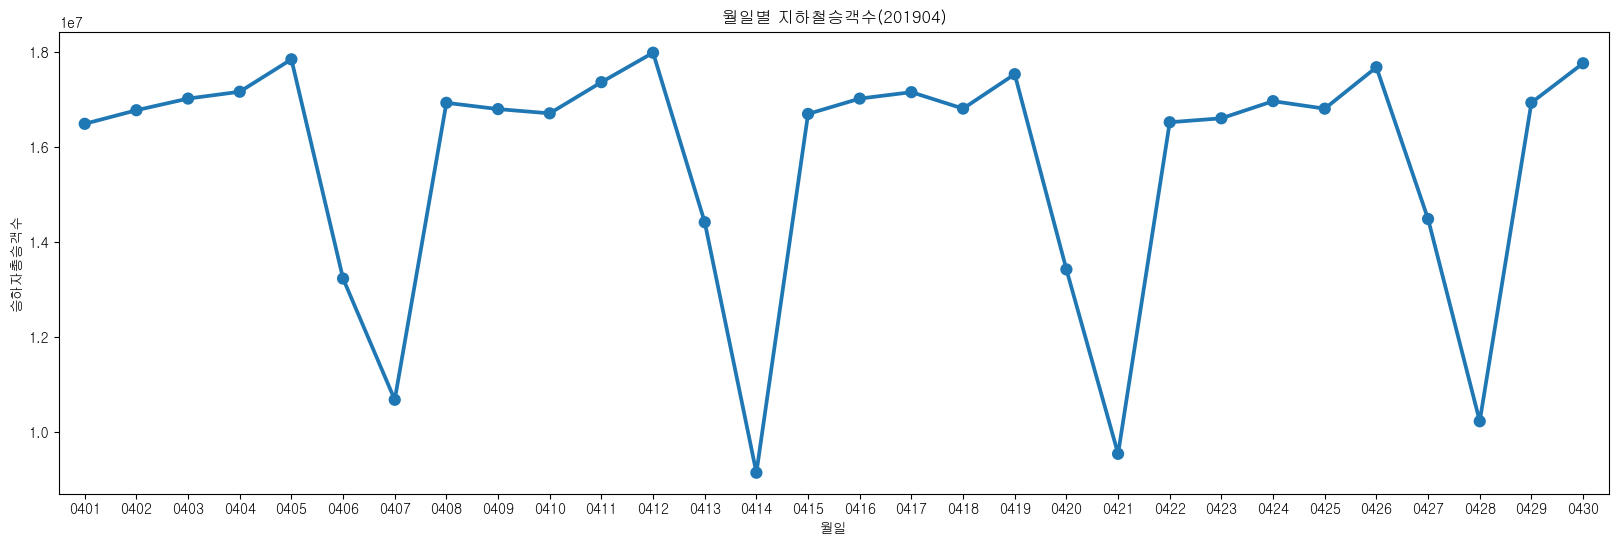

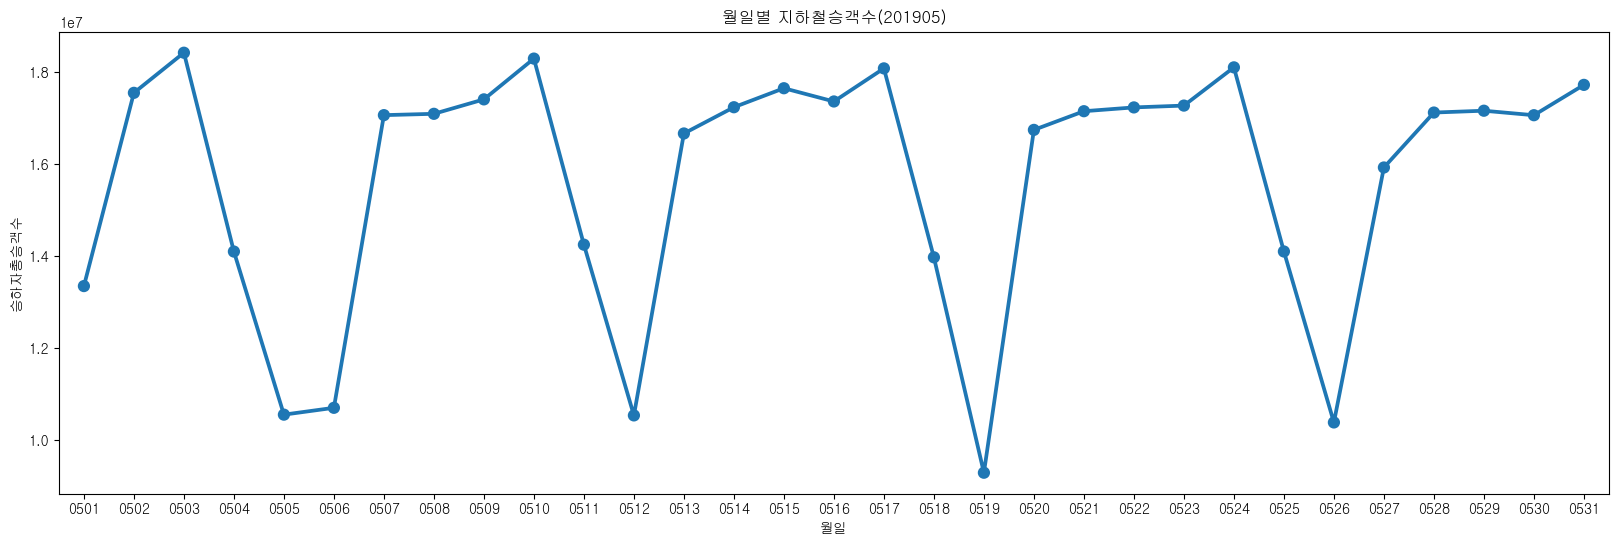

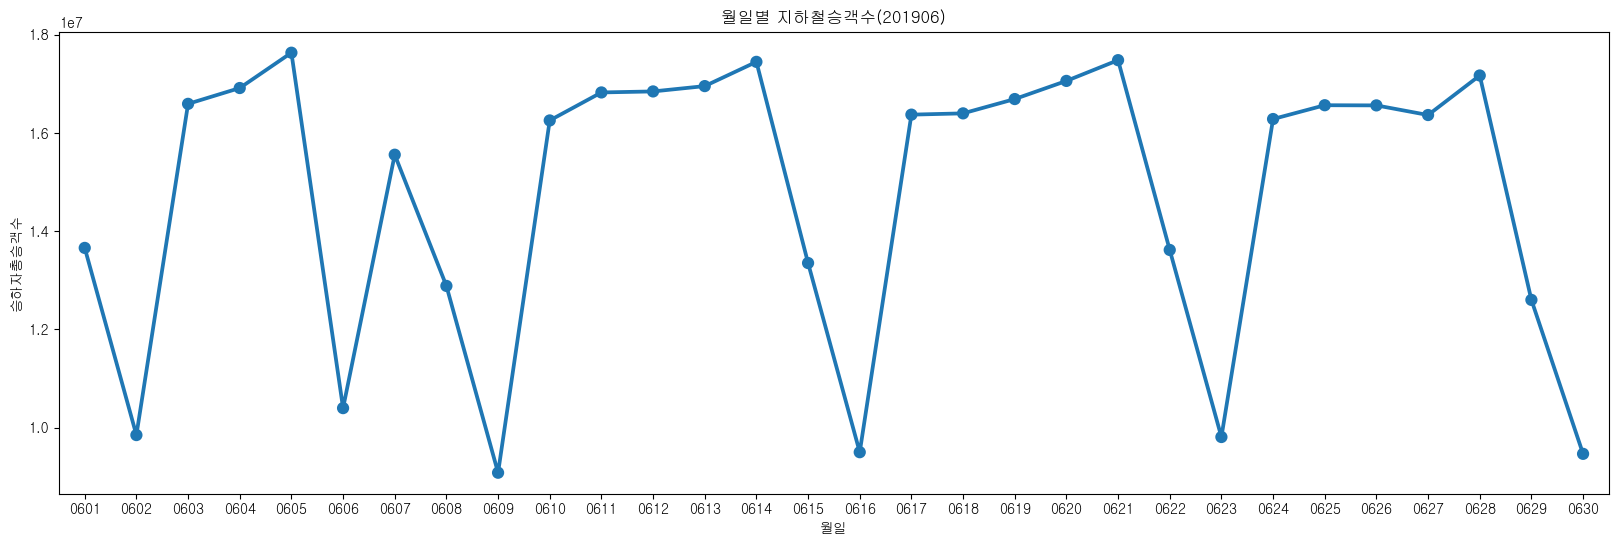

In [19]:
# 반복문을 사용해서 1월부터 6월까지의 그래프를 그린다

for month in raw['연월'].unique():
    df_selected = raw[ raw['연월'] == month]  # 해당 연월의 데이터 선택하기
    df_pivot = pd.pivot_table(df_selected, index = ['월일'], values = '승하자총승객수', aggfunc= 'sum')# 월일별 승객수 계산
    df_pivot = df_pivot.reset_index()
    
    fig, ax = plt.subplots( figsize=(20,6) )
    
    plt.title(f'월일별 지하철승객수({month})')  # 그래프 제목 추가하기
    sns.pointplot(data = df_pivot, x = '월일', y = '승하자총승객수')

# 5번 문제

In [38]:


station = raw.pivot_table(index = '역명', values = '승차총승객수', aggfunc='sum')
station = station.sort_values(by = '승차총승객수', ascending = False)
station.head(10)  # 승차승객수가 가장 많은 역 상위 10개

,승차총승객수
역명,
잠실,18574323.0
강남,18148024.0
고속터미널,17541287.0
홍대입구,17270084.0
서울역,17165598.0
사당,13294251.0
신림,12831374.0
선릉,11582155.0
구로디지털단지,11421335.0


In [32]:
station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 잠실 to 지평
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   승차총승객수  509 non-null    float64
dtypes: float64(1)
memory usage: 8.0+ KB


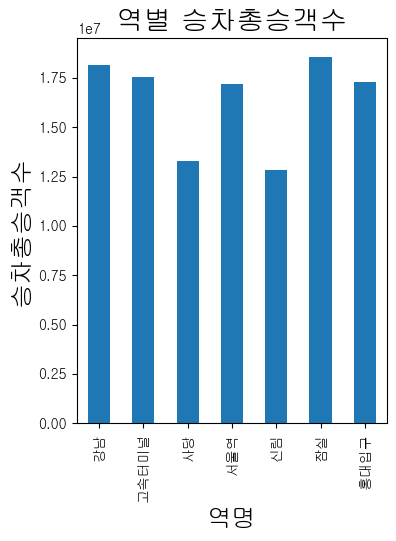

In [13]:
# 5번문제

#station=raw.groupby('역명').sum()['승하자총승객수'].idxmax()

station = raw.pivot_table(index = '역명', values = '승차총승객수', aggfunc='sum')
station = station.sort_values(by = '승차총승객수', ascending = False)
station= station.head(7)
plt.figure(figsize=(4,5))
passenger = station.groupby('역명').sum()['승차총승객수']
#station.plot.bar(x='역명', y =passenger)
passenger.plot(kind='bar')
plt.title('역별 승차총승객수', fontsize=20)
plt.xlabel('역명', fontsize=18)
plt.ylabel('승차총승객수', fontsize=18)

plt.show()

# 6번 문제

In [81]:
raw['노선명'].unique()

array(['2호선', '3호선', '6호선', '경의선', '1호선', '4호선', '7호선', '분당선', '인천선',
       '경춘선', '수인선', '신분당선', '경강선', '5호선', '8호선', '9호선', '인천2호선', '공항철도',
       '우이신설경전철'], dtype=object)

In [82]:
# 1~9호선만 선택해서 line_list에 넣는다.

line_list = [ ]
for line in raw['노선명'].unique():
    if line[1:] == '호선':    # x호선 인 경우를 선택. 
        line_list.append(line)
line_list

['2호선', '3호선', '6호선', '1호선', '4호선', '7호선', '5호선', '8호선', '9호선']

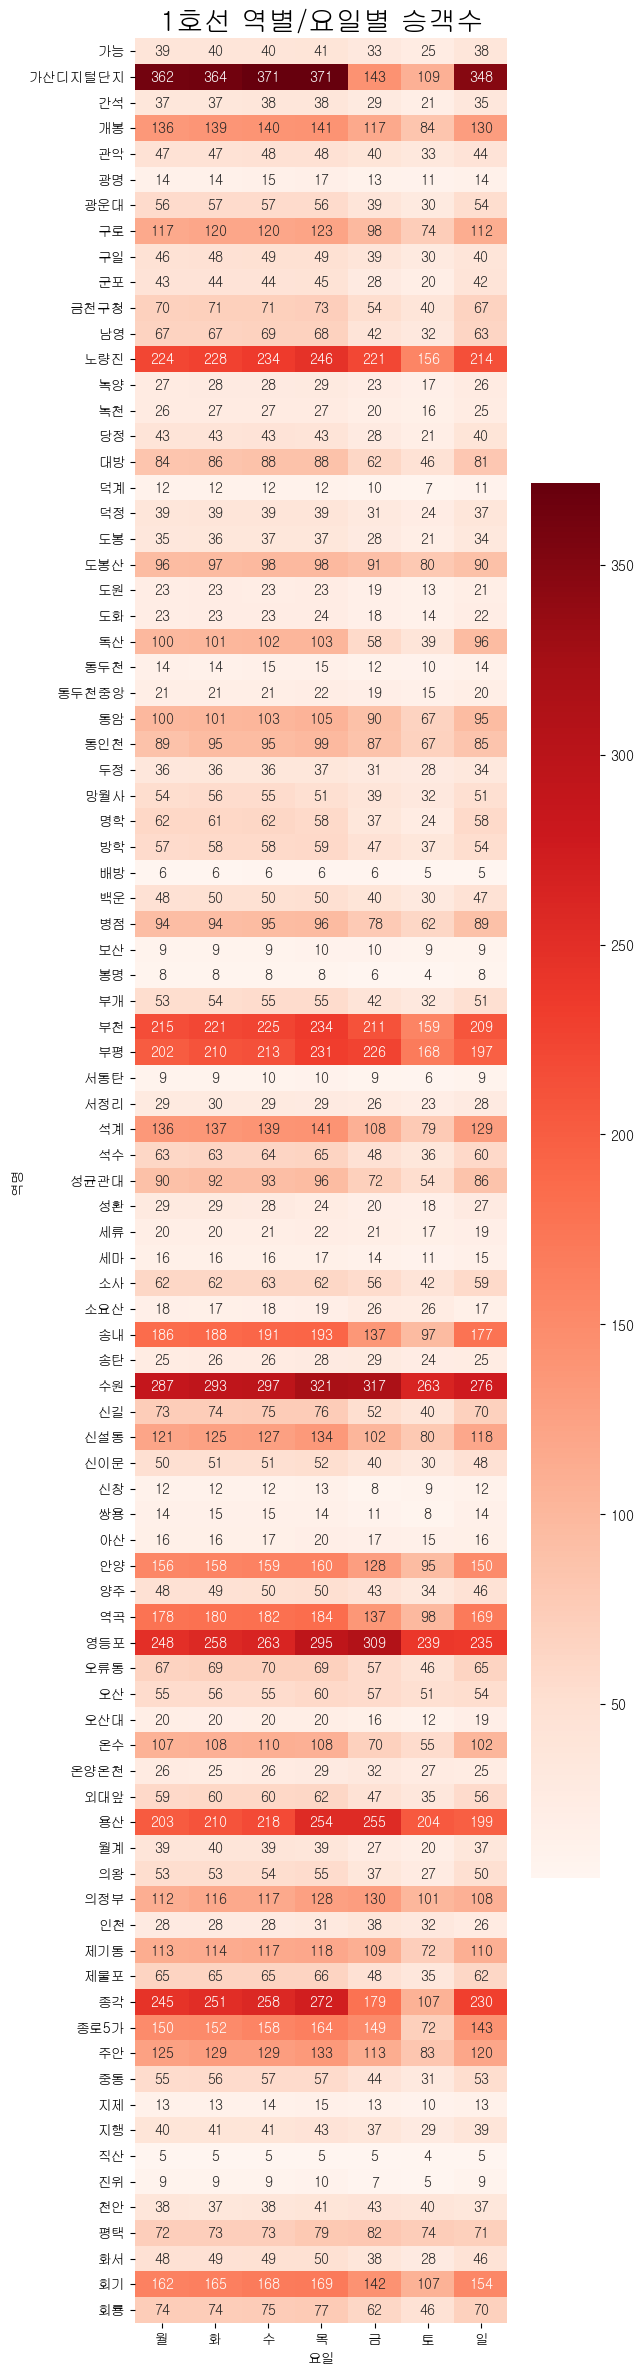

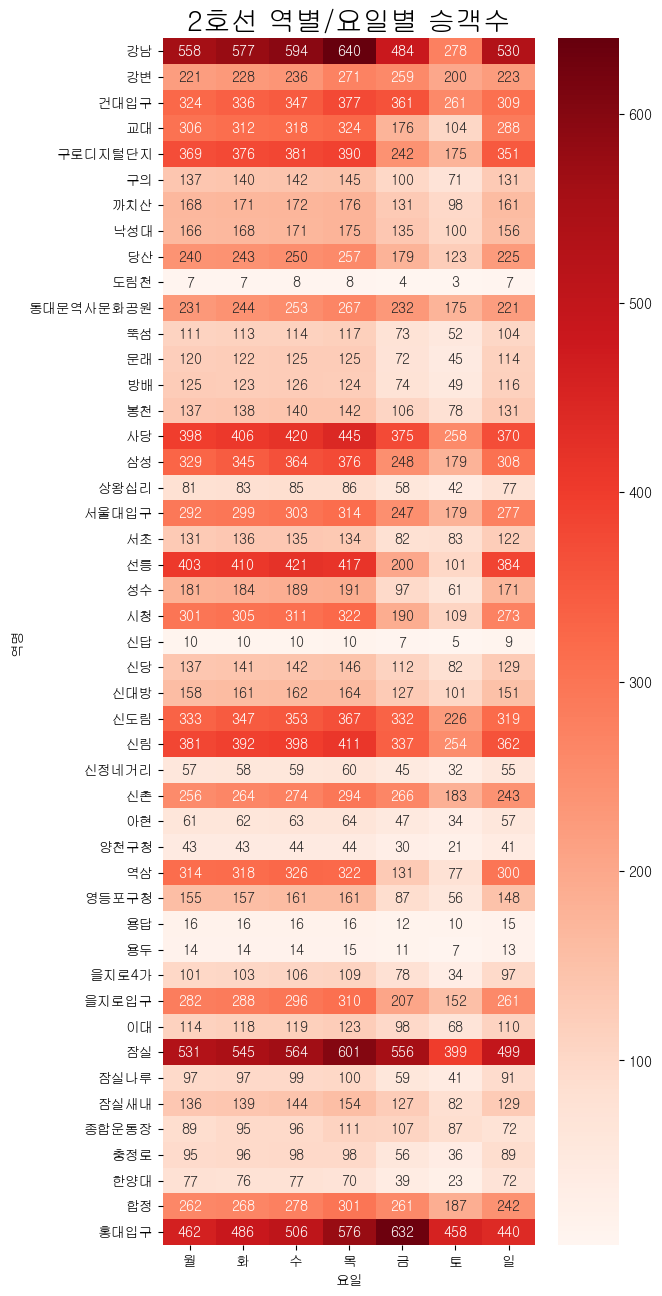

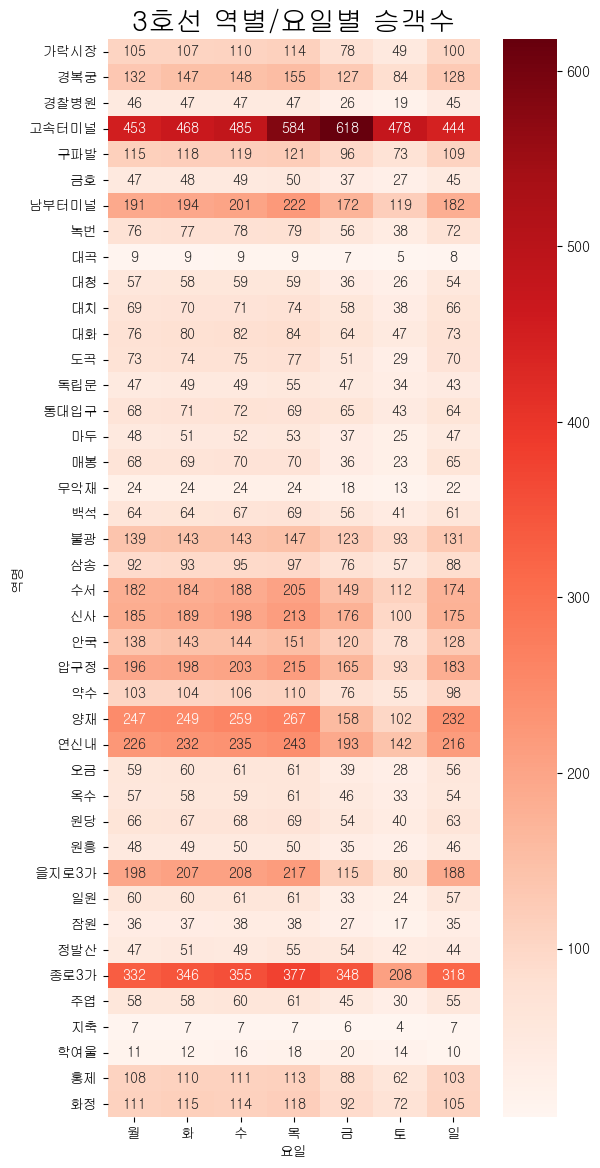

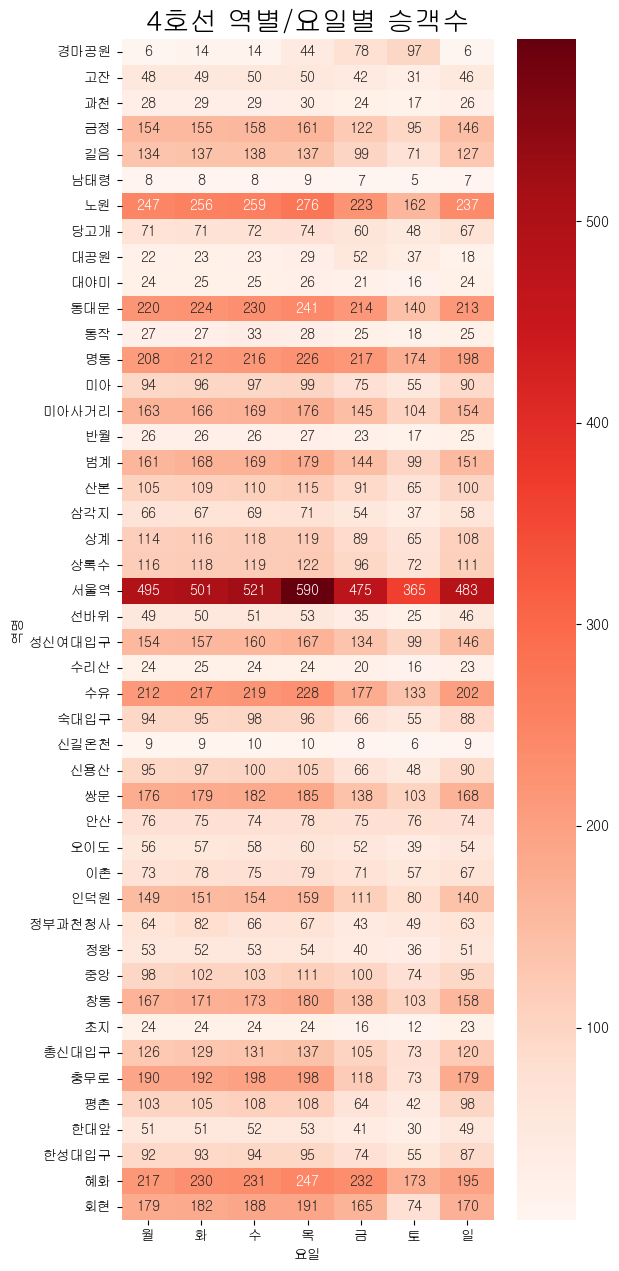

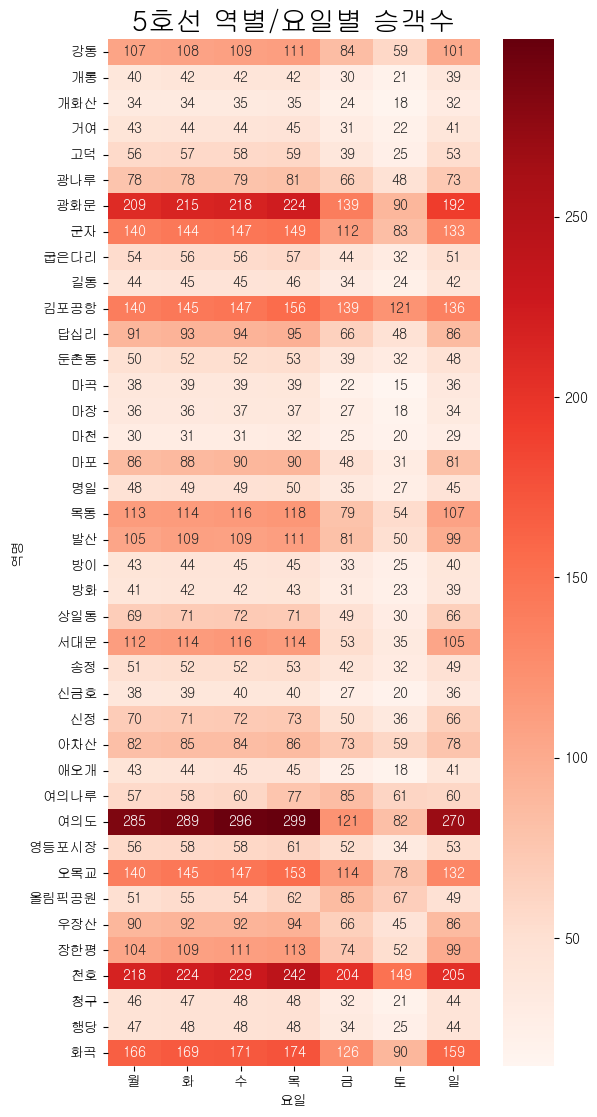

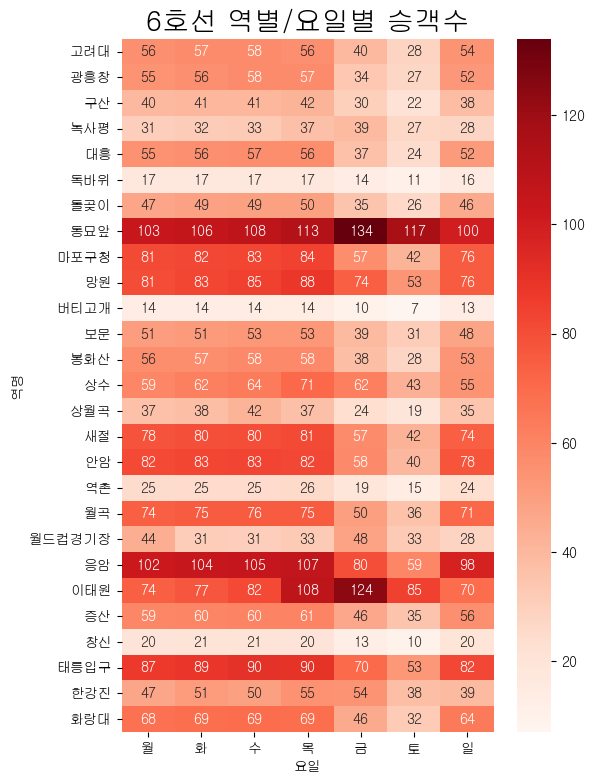

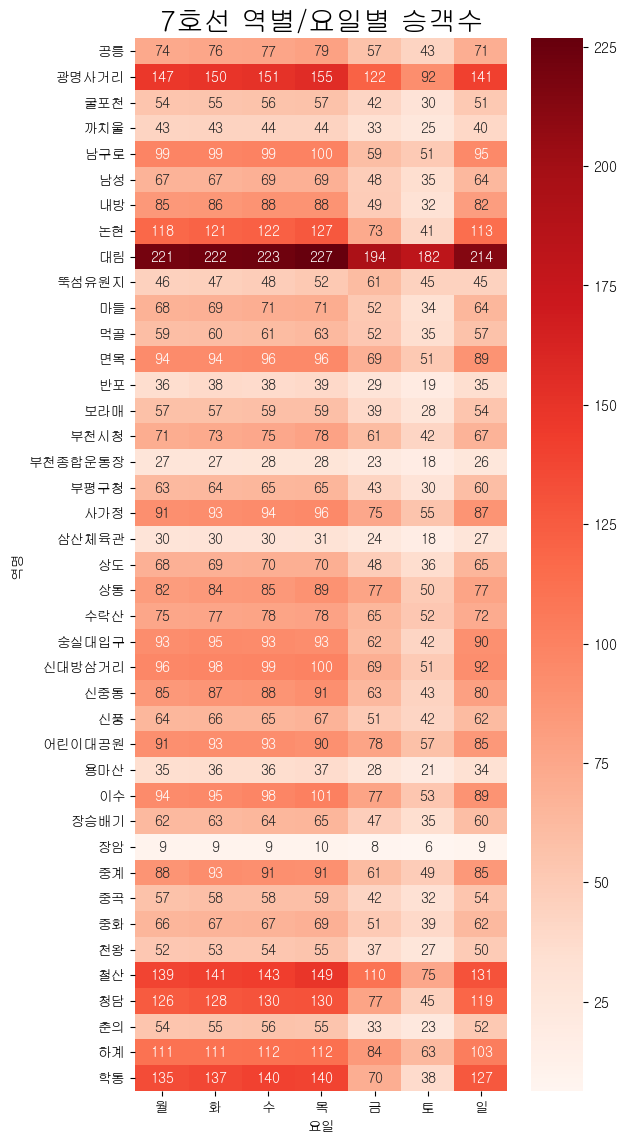

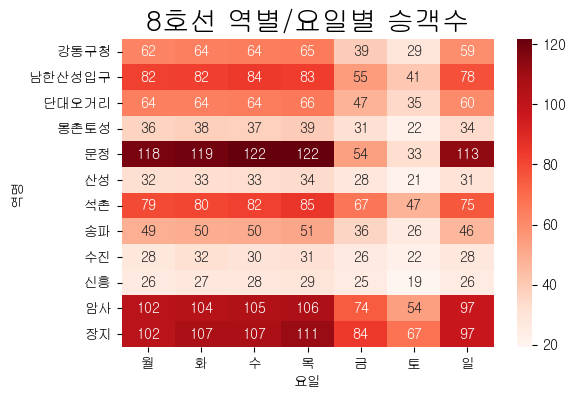

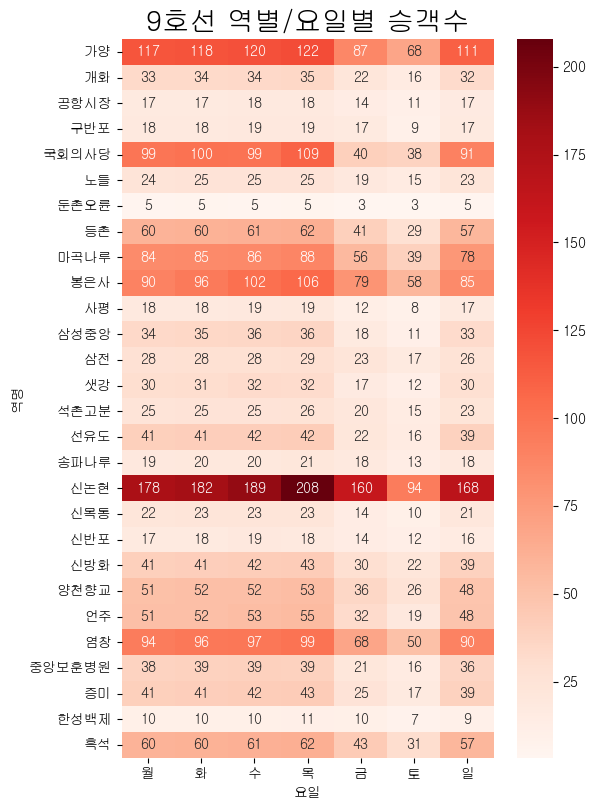

In [86]:
for line in sorted(line_list):
    
    # 데이터 정리하기
    data_line = raw[raw['노선명'] == line]
    df_pivot = data_line.pivot_table(index = ['역명'], columns = '요일', values = '승하자총승객수',aggfunc = 'sum')
    df_pivot = df_pivot[['월','화','수','목','금','토','일']]
    df_pivot = df_pivot / 10000  # 만명단위로 수정
    
    
    # 그래프 그리기
    fig, ax = plt.subplots( figsize=(6,len(df_pivot)/3 ) )   # 그래프 사이즈를 조정하여, 역 수가 많은 경우는 세로를 길게 표현
    plt.title(f"{line} 역별/요일별 승객수", fontsize = 20) # 그래프 제목
    sns.heatmap(df_pivot, cmap = "Reds", annot = True, fmt = '.0f')
    
# sns.heatmap(data, annot = True, fmt = '.0f', cmap = "RdBu_r")
# annot : True 일경우 값을 그래프에 표시
# fmt : 값 표시 형태.
# ex) 'f' : 실수로 표현(default 로 값이 있는 소수 자리까지 표시됨)
# ex) '.0f' : 실수로 표현해달라 (소수 0번째 자리까지만 == 정수자리만 )
# ex) '.1f' : 실수로 표현해달라 (소수 1번째 자리까지만)
# ex) .1% 는 퍼센트(소수 첫번째 자리까지 표시)

# 7번 문제

In [221]:
line = '1호선'
subway = raw.groupby(['노선명','역명']).mean().reset_index()
subway_1 = subway[subway['노선명']==line]
subway_1=subway_1.drop(['사용일자','승차총승객수','등록일자'],axis='columns')
subway_1

KeyError: "['사용일자'] not found in axis"

In [170]:
a = pd.DataFrame(index=subway_1['역명'])
a['평균'] = subway_1.mean(axis=1)
a['평균'].info

C:\Users\김종한\AppData\Local\Temp\ipykernel_15088\699877719.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a['평균'] = subway_1.mean(axis=1)


<bound method Series.info of 역명
가능        NaN
가산디지털단지   NaN
간석        NaN
개봉        NaN
관악        NaN
           ..
천안        NaN
평택        NaN
화서        NaN
회기        NaN
회룡        NaN
Name: 평균, Length: 89, dtype: float64>

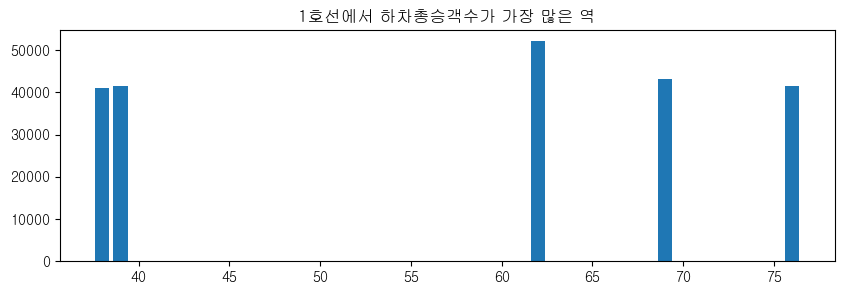

In [214]:

top5_subway = subway_1.sort_values(by='하차총승객수',ascending=False).head(5)
plt.figure(figsize=(10,3))
plt.bar(top5_subway.index,top5_subway['하차총승객수'])
plt.title('1호선에서 하차총승객수가 가장 많은 역')
plt.show()

In [233]:
top10_off = subway_1.sort_values(by='평균 하차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))

plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])


plt.title('2021년 6월 평균 하차 인원 수 Top10')
plt.show()

KeyError: '평균 하차 인원 수'